In [86]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [87]:
sen = pd.read_csv("ISEE-Index-20210713-024409.csv")

In [88]:
sen

,DATE,ALL SECURITIES,10 AVG,20 AVG,50 AVG,ALL EQUITIES,10 AVG.1,20 AVG.1,50 AVG.1,ALL ETFS,10 AVG.2,20 AVG.2,50 AVG.2
0,1/3/2006,149,0,0,0,212,0,0,0,49,0,0,0
1,1/4/2006,180,0,0,0,218,0,0,0,74,0,0,0
2,1/5/2006,195,0,0,0,264,0,0,0,38,0,0,0
3,1/6/2006,144,0,0,0,226,0,0,0,28,0,0,0
4,1/9/2006,188,0,0,0,256,0,0,0,45,0,0,0
5,1/10/2006,154,0,0,0,249,0,0,0,25,0,0,0
6,1/11/2006,192,0,0,0,263,0,0,0,42,0,0,0
7,1/12/2006,135,0,0,0,208,0,0,0,27,0,0,0
8,1/13/2006,158,0,0,0,199,0,0,0,31,0,0,0
9,1/17/2006,170,167,0,0,213,231,0,0,39,40,0,0


In [89]:
sen = sen[["DATE","ALL SECURITIES","ALL EQUITIES","ALL ETFS"]]

In [90]:
sen.DATE = pd.to_datetime(sen.DATE)

/Users/ludwig/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [91]:
sen = sen.rename(columns = {"DATE":"Date"})

In [92]:
sen

,Date,ALL SECURITIES,ALL EQUITIES,ALL ETFS
0,2006-01-03,149,212,49
1,2006-01-04,180,218,74
2,2006-01-05,195,264,38
3,2006-01-06,144,226,28
4,2006-01-09,188,256,45
5,2006-01-10,154,249,25
6,2006-01-11,192,263,42
7,2006-01-12,135,208,27
8,2006-01-13,158,199,31
9,2006-01-17,170,213,39


In [93]:
df = yf.download("NVDA","2019-1-1","2021-01-01")

[*********************100%***********************]  1 of 1 completed


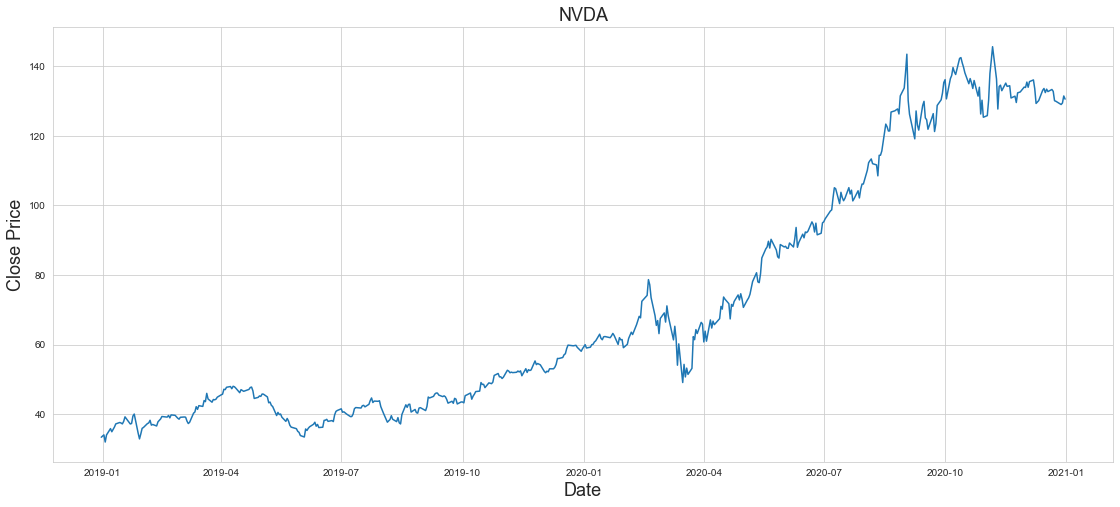

In [94]:
plt.figure(figsize = (19,8))
plt.title("NVDA",fontsize = 18)
plt.plot(df.Close)
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price",fontsize = 18)
plt.show()

In [95]:
shortEMA = df.Close.ewm(span = 5, adjust = False).mean()

mediumEMA = df.Close.ewm(span = 10, adjust = False).mean()

volEMA = df.Volume.ewm(span = 10, adjust = False).mean()


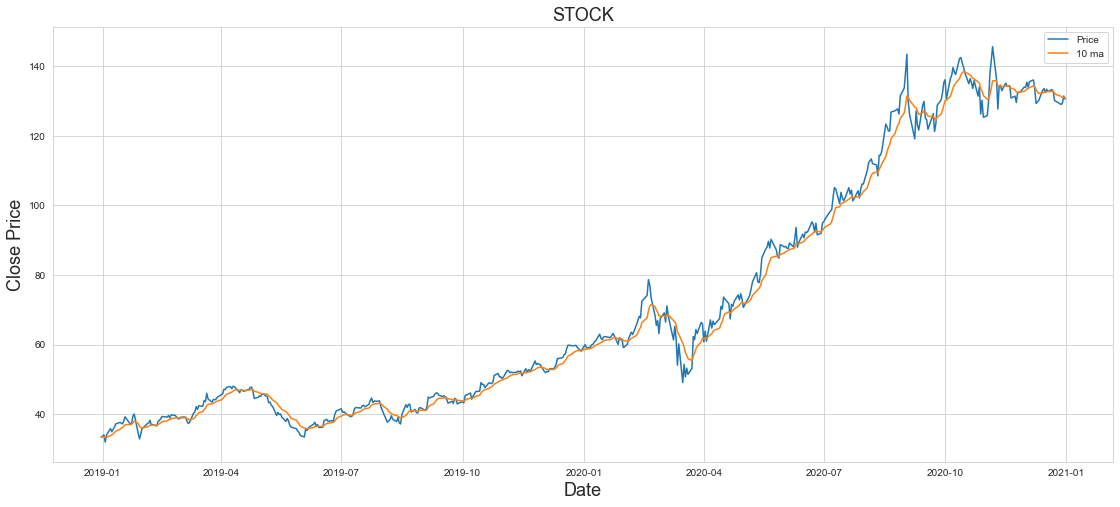

In [96]:
plt.figure(figsize = (19,8))
plt.title("STOCK",fontsize = 18)
plt.plot(df.Close, label = "Price")
#plt.plot(shortEMA,label = "5 ma")
plt.plot(mediumEMA,label = "10 ma")
#plt.plot(longEMA, label = "63 ma")


plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price",fontsize = 18)
plt.legend()
plt.show()

In [97]:
sen = sen.set_index("Date")

In [98]:
nasd = sen.loc["2018-12-31":"2020-12-31"]

In [99]:
merge=pd.merge(df,nasd, how='inner', left_index=True, right_index=True)

In [100]:
merge.rename(columns = {"ALL SECURITIES":"sec","ALL EQUITIES":"eq","ALL ETFS":"etf"},inplace = True )

In [101]:
df = merge

In [102]:
sec = df.sec.ewm(span = 10, adjust = False).mean()

In [103]:
#df["short"] = shortEMA
df["middle"] = mediumEMA
df["vol"] = volEMA
df["sec10"] = sec
#df["long"] = longEMA
#df["sma_50"] = EMA

In [104]:
df = df.div(df.iloc[0]).mul(100)

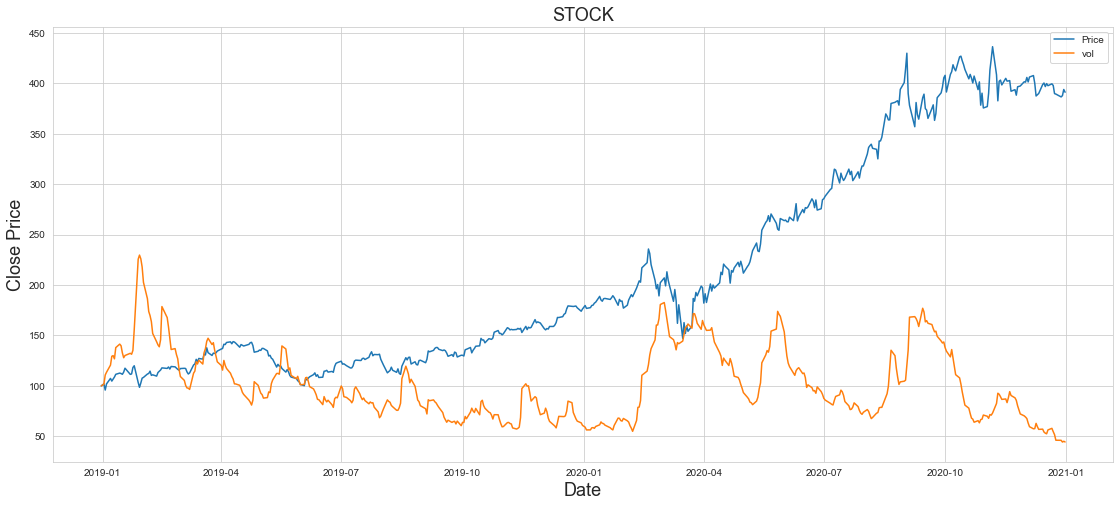

In [105]:
plt.figure(figsize = (19,8))
plt.title("STOCK",fontsize = 18)
plt.plot(df.Close, label = "Price")
plt.plot(df.vol,label = "vol")
#plt.plot(df.middle,label = "price sma")



plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price",fontsize = 18)
plt.legend()
plt.show()

In [106]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
sec          0
eq           0
etf          0
middle       0
vol          0
sec10        0
dtype: int64

In [107]:
# Funkar även bra med eq

In [108]:
def buy_sell_function(data):
    buy_list = []
    sell_list = []
    
    flag_long = False
    flag_short = False
    
    for i in range(0, len(data)):
        if data["Close"][i] < 0.98 * data["middle"][i] and flag_long == False and flag_short == False:
            buy_list.append(data["Close"][i])
            sell_list.append(np.nan)
            flag_short = True
            
        elif flag_short == True and data["Close"][i] > 1.01 * data["middle"][i]:
            sell_list.append(data["Close"][i])
            buy_list.append(np.nan)
            flag_short = False

        else:
            buy_list.append(np.nan)
            sell_list.append(np.nan)
            
            
    return (buy_list,sell_list)
            
            
            
            

In [109]:
df["buy"] = buy_sell_function(df)[0]
df["sell"] = buy_sell_function(df)[1]

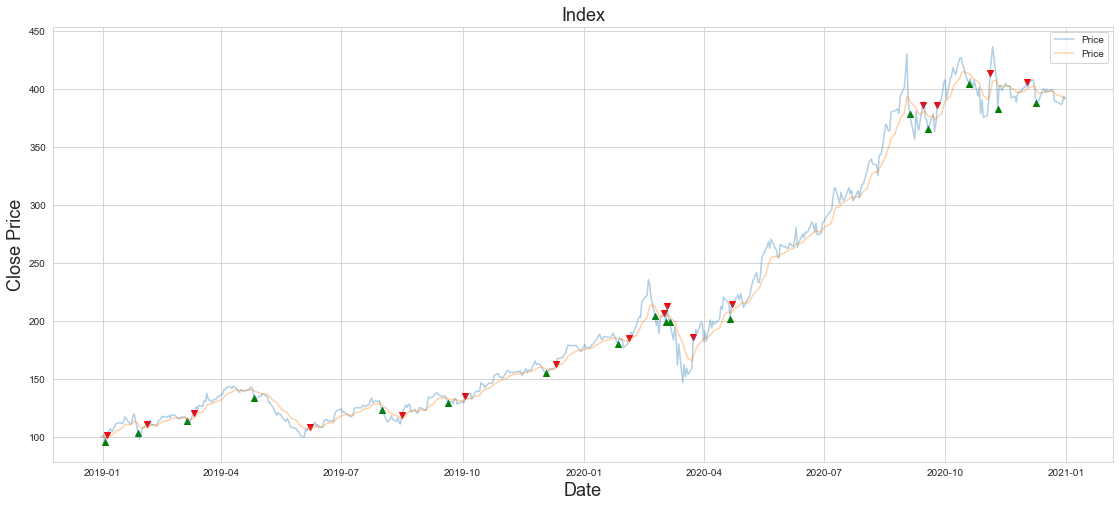

In [110]:
plt.figure(figsize = (19,8))
plt.title("Index",fontsize = 18)
plt.plot(df.Close, label = "Price", alpha = 0.35)
plt.plot(df.middle, label = "Price", alpha = 0.35)

plt.scatter(df.index, df["buy"], color= "green", marker="^", alpha = 1)
plt.scatter(df.index, df["sell"],color = "red",marker  = "v", alpha = 1)


plt.xlabel("Date", fontsize = 18)
plt.ylabel("Close Price",fontsize = 18)
plt.legend()
plt.show()

In [111]:
pd.options.display.max_rows = 500
pd.options.display.min_rows = 500

In [112]:
df1 = df.copy()

In [113]:
stock = df1.buy.dropna().to_frame()

In [114]:
stock.reset_index(inplace = True)

In [115]:
stock["sell"] = df1.sell.dropna().to_frame().reset_index().drop(columns = "Date")

In [116]:
stock.drop(columns = "Date", inplace = True)

In [117]:
round(stock.pct_change(axis = 1),2)

,buy,sell
0,NaN,0.06
1,NaN,0.08
2,NaN,0.06
3,NaN,-0.18
4,NaN,-0.03
5,NaN,0.05
6,NaN,0.05
7,NaN,0.03
8,NaN,0.01
9,NaN,0.07


In [118]:
stock["Return"] = round(stock.pct_change(axis = 1),2).iloc[:,1:2]

In [119]:
stock.Return

0     0.06
1     0.08
2     0.06
3    -0.18
4    -0.03
5     0.05
6     0.05
7     0.03
8     0.01
9     0.07
10   -0.06
11    0.06
12    0.02
13    0.06
14    0.02
15    0.06
16    0.00
Name: Return, dtype: float64

In [120]:
stock.Return.sum()

0.36000000000000004